<a href="https://colab.research.google.com/github/rozankc/Roza_INFO5731_Spring2025/blob/main/KhanChowdhury_Roza_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import re
import spacy
import pandas as pd
from collections import defaultdict
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Load the spacy language model
nlp = spacy.load("en_core_web_sm")

# Load the Twitter CSV file
file_path = 'cleaned_tweets.csv'
df = pd.read_csv(file_path)

# Preprocessing Text
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  words = text.split()
  return words

# **Generate N-grams**
def generate_ngrams(words, n):
  return [tuple(words[i:i+n]) for i in range(len(words) - n + 1)]

# **Counting N-gram Frequencies**

# To store processed data
bigram_counts = defaultdict(int)
trigram_counts = defaultdict(int)

# Loop through each tweet and process it
for review in df["Text"].dropna():
    words = preprocess_text(review)
    bigrams = generate_ngrams(words, 2)
    trigrams = generate_ngrams(words, 3)

    # Count occurrences of bigrams
    for bigram in bigrams:
        bigram_counts[bigram] += 1

    # Count occurrences of trigrams
    for trigram in trigrams:
        trigram_counts[trigram] += 1

# **Calculate the Bigram Probabilities**
unigram_counts = defaultdict(int)

# Count occurrences of individual words
for tweets in df["Text"].dropna():
    words = preprocess_text(review)
    for word in words:
        unigram_counts[word] += 1

# Compute probabilities for each bigram using the formula:
# P(w2 | w1) = count(w1, w2) / count(w1)
bigram_probabilities = {}

for bigram, bigram_count in bigram_counts.items():
    word1 = bigram[0]
    if unigram_counts[word1] > 0:
        bigram_probabilities[bigram] = bigram_count / unigram_counts[word1]

# **Extracting the Noun Phrases**
# To store processed data
noun_phrase_counts = defaultdict(int)

# Process each tweet and extract noun phrases
for tweets in df["Text"].dropna():
    doc = nlp(review)
    for chunk in doc.noun_chunks:
        phrase = chunk.text.lower()
        noun_phrase_counts[phrase] += 1

#** Calculate the relative probabilities of noun phrases**
# Calculate the maximum frequency of any noun phrase in the dataset
max_freq = max(noun_phrase_counts.values())

# Calculate relative probability
noun_phrase_probabilities = {phrase: count / max_freq for phrase, count in noun_phrase_counts.items()}

# **Create DataFrames**
bigram_df = pd.DataFrame(list(bigram_counts.items()), columns=["Bigram", "Frequency"]).sort_values(by="Frequency", ascending=False)
trigram_df = pd.DataFrame(list(trigram_counts.items()), columns=["Trigram", "Frequency"]).sort_values(by="Frequency", ascending=False)
bigram_prob_df = pd.DataFrame(list(bigram_probabilities.items()), columns=["Bigram", "Probability"]).sort_values(by="Probability", ascending=False)
noun_phrase_df = pd.DataFrame(list(noun_phrase_probabilities.items()), columns=["Noun Phrase", "Relative Probability"]).sort_values(by="Relative Probability", ascending=False)


# Print Results
print("\nTop 10 Bigrams with Frequency:")
print(bigram_df.head(10))
print("\nTop 10 Trigrams with Frequency:")
print(trigram_df.head(10))
print("\nTop 10 Bigram Probabilities:")
print(bigram_prob_df.head(10))
print("\nTop 10 Noun Phrases with Relative Probability:")
print(noun_phrase_df.head(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Top 10 Bigrams with Frequency:
                            Bigram  Frequency
71                (python, coding)         39
72            (coding, javascript)         36
74         (rstats, 100daysofcode)         35
73            (javascript, rstats)         34
107   (100daysofcode, programming)         29
108           (programming, linux)         28
68            (tech, deeplearning)         27
104  (datascience, datascientists)         26
70         (cybersecurity, python)         24
69   (deeplearning, cybersecurity)         21

Top 10 Trigrams with Frequency:
                                   Trigram  Frequency
69            (python, coding, javascript)         36
71     (javascript, rstats, 100daysofcode)         34
70            (coding, javascript, rstats)         34
105    (100daysofcode, programming, linux)         28
104   (rstats, 100daysofcode, programming)         26
68         (cybersecurity, python, coding)         24
66     (tech, deeplearning, cybersecurity)         

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Load the Twitter CSV file
file_path = 'cleaned_tweets.csv'
df = pd.read_csv(file_path)

# First 100 records
num_records = 100
specific_records = df.head(num_records)

tweets = specific_records['Text'].tolist()

# Design a Query
query = "Debating the best #BigData platform: Hadoop vs. Spark? What's your take?"

# Build the TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tweets)

# Transform the query using the same vectorizer
query_vector = vectorizer.transform([query])

# Calculate cosine similarity between the query and each document
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

# Rank the documents with respect to query
tweet_ranking = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Create a DataFrame for the Ranked results
ranked_df = pd.DataFrame(tweet_ranking, columns=['Tweet Index', 'Similarity'])

ranked_df['Tweet Text'] = ranked_df['Tweet Index'].apply(lambda x: tweets[x])
ranked_df['Tweet Index'] = ranked_df['Tweet Index'] + 1

# Print Results
print("Tweet Ranking (DataFrame):")
print(ranked_df)

Tweet Ranking (DataFrame):
    Tweet Index  Similarity                                         Tweet Text
0            24    0.208380  learn about resilient distributed dataset (rdd...
1             2    0.191353  10 ways technology will transform the human bo...
2            29    0.173513  do you suspect your partner is cheating and wa...
3            65    0.156055  do you suspect your partner is cheating and wa...
4            67    0.156055  do you suspect your partner is cheating and wa...
..          ...         ...                                                ...
95           11    0.007221  ai agents: freeing teams from monotonous tasks...
96           96    0.006790  iron mountain linked to data center developmen...
97            7    0.006542  @ai_trumpnews big pharma files sound juicy! 🤫 ...
98           97    0.005989  today’s vehicles require specialists in #tech ...
99           39    0.004938  💰 ¡tus datos valen millones y no lo sabías! 😱📲...

[100 rows x 3 columns]


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
!pip install gensim

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.3 MB/s eta 0:00:00



Visualize the word embeddings:


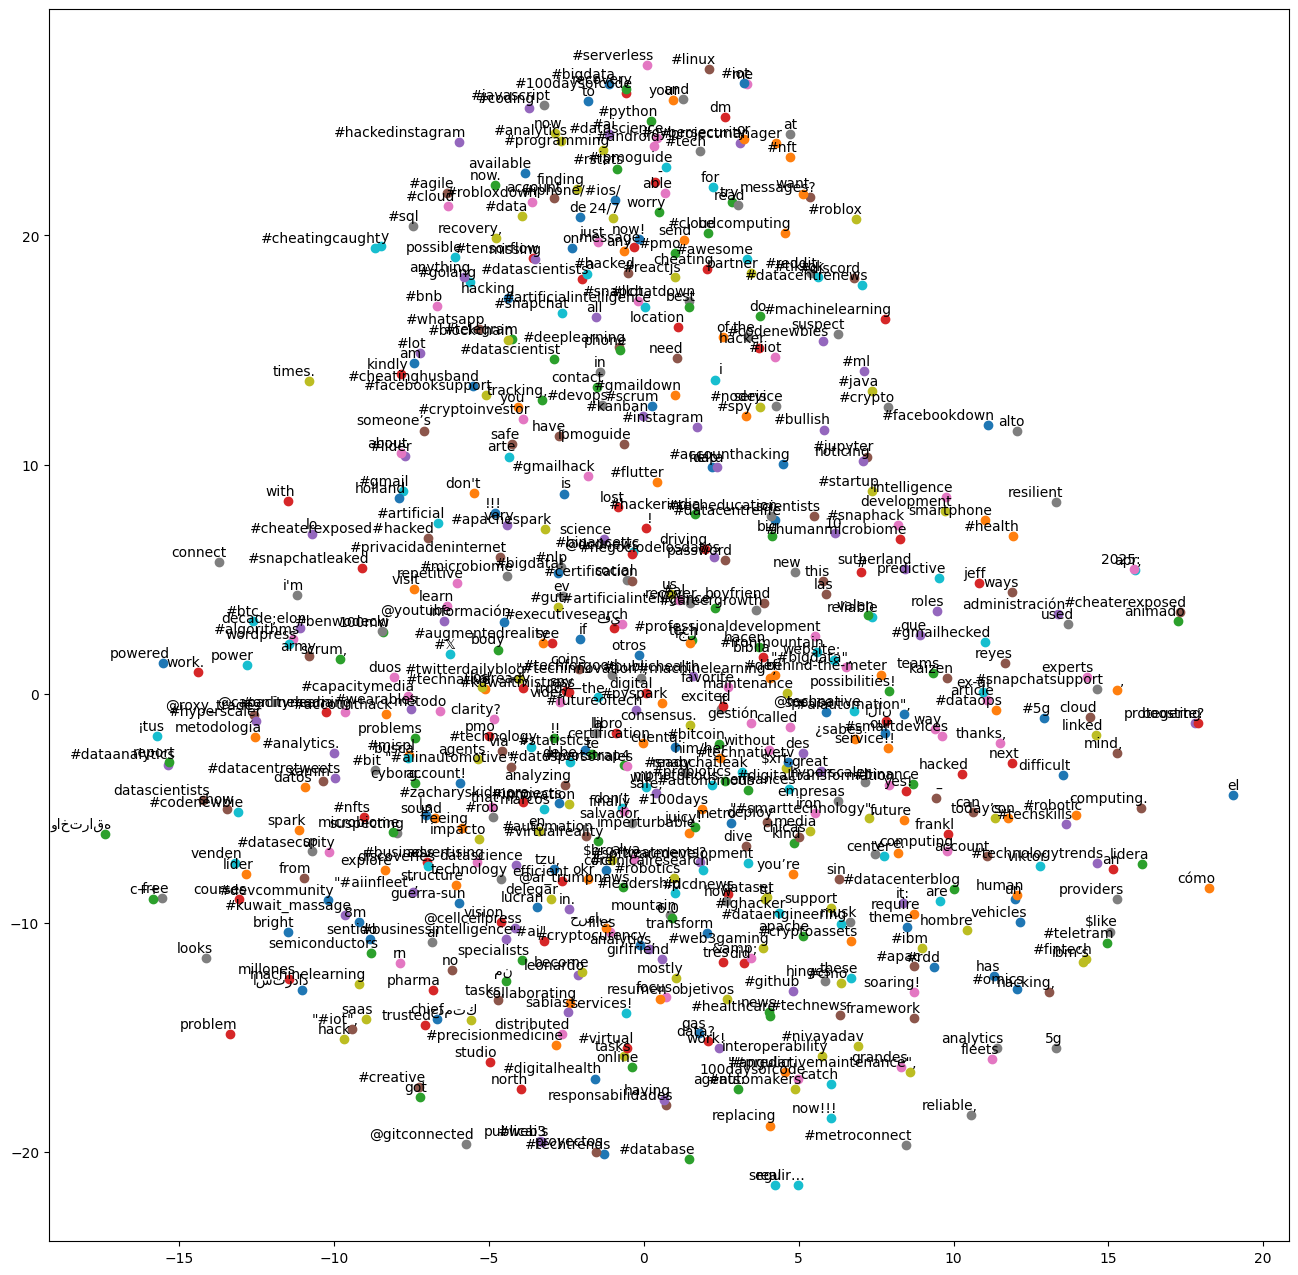


Cosine Similarity Calculations:
Cosine similarity between '#bigdata' and '#analytics': 0.4849
Cosine similarity between '#tech' and '#deeplearning': 0.2963
Cosine similarity between 'connect' and 'with': 0.0373
Cosine similarity between '#ai' and '#machinelearning': 0.3964


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import emoji

def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

# Load the Twitter CSV file
file_path = 'cleaned_tweets.csv'
df = pd.read_csv(file_path)

# First 100 records (you can increase this number)
num_records = 100
specific_records = df.head(num_records)

# Remove emojis from the 'Text' column
specific_records['Text'] = specific_records['Text'].apply(remove_emojis)

tweets = specific_records['Text'].tolist()

# Tokenize the Tweets
tokenized_tweets = [tweet.split() for tweet in tweets]

# Train Word2Vec Model
model = Word2Vec(sentences=tokenized_tweets, vector_size=300, window=5, min_count=1, workers=4)

# Prepare Data for t-SNE Plotting
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)

    tokens = np.array(tokens)

    tsne_model = TSNE(perplexity=min(30, len(tokens) - 1), n_components=2, init="pca", max_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")

    plt.show()

# Visualize the word embeddings
print("\nVisualize the word embeddings:")
tsne_plot(model)

# Calculate the cosine similarity
def calculate_cosine_similarity(model, word1, word2):
    try:
        similarity = model.wv.similarity(word1, word2)
        print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")
    except KeyError:
        print(f"One or both words ('{word1}', '{word2}') not in vocabulary.")

# Calculate cosine similarity for word pairs
word_pairs = [
    ("#bigdata", "#analytics"),
    ("#tech", "#deeplearning"),
    ("connect", "with"),
    ("#ai", "#machinelearning")
]

print("\nCosine Similarity Calculations:")
for pair in word_pairs:
    calculate_cosine_similarity(model, pair[0], pair[1])

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/rozankc/Roza_INFO5731_Fall2024/blob/main/annotated_tweets.csv



# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

The assignment was quite interesting and not too difficult. I enjoyed working on sentiment analysis and learning how to label data efficiently. I did face some problem with question number 3 with the visualization, I hope I was able to do it according to the instruction. However, the biggest challenge was the scheduling—having multiple deadlines for different courses at the same time, along with mid-terms, made it overwhelming. It would have been helpful if the deadline for the project proposal and this assignment were spaced out instead of being back-to-back. Overall, it was a valuable learning experience.